# Potential Returns using MACD for PSE Companies

In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stat
from scipy.stats import norm
%matplotlib inline

C:\Users\ja_tr\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### DATA USED IN THE PROGRAM

In [2]:
# OPENS THE STOCK.TXT WHERE IT CONTAINS THE COMPANIES TO BE ANALYZED BY THE PROGRAM
f = open(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\stock.txt')
tickers = f.read().split()
f.close()

len(tickers)

38

There are 38 companies to be used in the data. 

In [3]:
tickers

['MEG',
 'JGS',
 'URC',
 'MER',
 'ICT',
 'MBT',
 'SECB',
 'MPI',
 'LTG',
 'NIKL',
 'BDO',
 'BLOOM',
 'SPNEC',
 'HOME',
 'FCG',
 'PCOR',
 'PRMX',
 'AR',
 'CHP',
 '2GO',
 'CNVRG',
 'ACEN',
 'MONDE',
 'SCC',
 'AEV',
 'ALI',
 'AREIT',
 'SMPH',
 'DMC',
 'WLCON',
 'JFC',
 'BPI',
 'RLC',
 'GSMI',
 'GMA7',
 'FGEN',
 'COSCO',
 'FPH']

Above shows the different companies to be used in the program.

### BELOW IS A PROGRAM FOR PLOTTING THE STOCK PRICE AND MACD OF A RANDOM COMPANY IN PSE

In [4]:
import random

# OPENS THE STOCK.TXT WHERE IT CONTAINS THE COMPANIES TO BE ANALYZED BY THE PROGRAM
f = open(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\stock.txt')
tickers = f.read().split()
f.close()

# MAIN BODY OF PROGRAM

# GETS A RANDOM COMPANY FROM THE LIST
name = tickers[random.randint(0, len(tickers))]
#   READS CSV FILES AND REVERSES THE ROWS TO START AT THE OLDEST DATE
hist = pd.read_csv(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\STOCK DATA\\'+ name +' Historical Data.csv')
hist = hist[::-1].reset_index(drop = True) 

# DROPS UNUSED COLUMNS FROM DATASETS - YOU CAN DROP THIS IF YOU HAVE A DIFFERENT SOURCE OF DATA
df = hist.drop(columns = ['Open', 'Low', 'High', 'Vol.', 'Change %'])

# CALCULATES MACD SIGNALS (EDIT FAST AND SLOW FOR OTHER COMBINATIONS) - CHANGE THE 'Price' TO THE NAME OF THE COLUMN CONTAINING THE CLOSING PRICE
signal = hist.ta.macd(close='Price', fast=12, slow=26, append=True)

# ADDS NEW COLUMNS BASED ON THE CALCULATED VALUES OF MACD
df['MA12'] = signal['MACD_12_26_9']
df['MA26'] = signal['MACDs_12_26_9']
df['MACD'] = signal['MACDh_12_26_9']
test_d = df.dropna().reset_index(drop=True)

# CONVERTS ARRAY TO LIST    
price = list(test_d["Price"])
histo = list(test_d["MACD"])

# VARIABLES (RESETS FOR EACH COMPANY)
s_buy = []
s_sell = []
is_neg = 0
growth = []

# CHECKS THE FIRST VALUE OF HISTOGRAM (IF NEGATIVE OR POSITIVE)  
if histo[0] < 0:
    is_neg = 1

# GET BUY AND SELL VALUES      
for x in range(len(test_d)):
    if is_neg == 1:
        if histo[x] > 0:
            s_buy.append(price[x])
            s_sell.append(np.nan)
            is_neg = 0
        else:
            s_buy.append(np.nan)
            s_sell.append(np.nan)
    else:
        if histo[x] < 0:
            s_sell.append(price[x])
            s_buy.append(np.nan)
            is_neg = 1
        else:
            s_buy.append(np.nan)
            s_sell.append(np.nan)

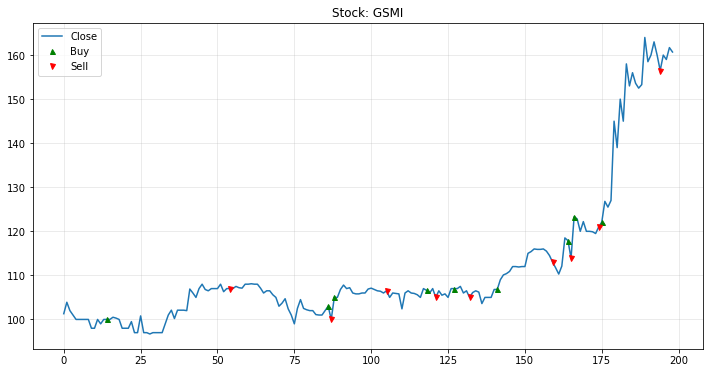

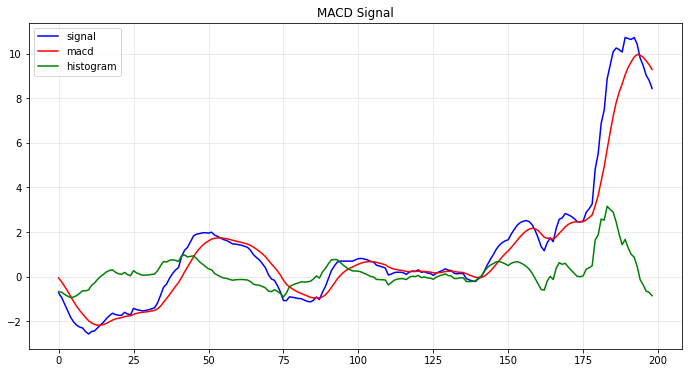

In [5]:
# PLOTTING THE DATA
sigb_df = pd.DataFrame({'B': s_buy})
sigs_df = pd.DataFrame({'S': s_sell})
test_df = pd.concat([test_d, sigb_df], axis=1)
test_df = pd.concat([test_df, sigs_df], axis=1)

date = test_df['Date'].to_numpy()
b = test_df['B'].to_numpy()
s = test_df['S'].to_numpy()
close = test_df['Price'].to_numpy()
m12 = test_df['MA12'].to_numpy()
m26 = test_df['MA26'].to_numpy()
m = test_df['MACD'].to_numpy()

# PLOTTING THE STOCK MARKET PRICE AND ITS BUY AND SELL SIGNAL BASED ON MACD VALUES
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(close[-200:-1], label = 'Close')
plt.plot(b[-200:-1], '^', color = 'g', markersize = 5, label = 'Buy')
plt.plot(s[-200:-1], 'v',color = 'r', markersize = 5, label = 'Sell')
plt.legend(loc=2);
plt.title('Stock: ' + name)

plt.show()

# PLOTTING THE MACD INDICATORS
plt.rcParams['figure.figsize'] = 11.7, 6
plt.grid(True, alpha = .3)
plt.plot(m12[-200:-1], color = 'b', label = 'signal')
plt.plot(m26[-200:-1], color = 'r', label = 'macd')
plt.plot(m[-200:-1], color = 'g', label = 'histogram')
plt.legend(loc=2);
plt.title('MACD Signal')

plt.show()

The plot titled Stock:() shows a section of the price action of a company. The arrows indicates where the program chose to buy and sell the stock.

Below that plot is the the plot for the MACD indicator at the same section shown on the Stock plot.

### HOW THE MACD INDICATOR IS USED

The MACD indicator has three parts: MACD line, Signal line and the Histogram. The value of the Histogram is based on the difference of the values of the MACD line and the Signal line. Once the Signal line crosses the MACD line the value of the Histogram is zero.

Directions for buying:
    1. If histogram is below zero and is moving up approaching zero.
    2. Once histogram reaches zero from below, this is a buy signal.

Directions for selling:
    1. If histogram is above zero and is moving down approaching zero.
    2. Once histogram reaches zero from above, this is a sell signal.

### MAIN PROGRAM 

In [6]:
# OPENS THE STOCK.TXT WHERE IT CONTAINS THE COMPANIES TO BE ANALYZED BY THE PROGRAM
f = open(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\stock.txt')
tickers = f.read().split()
f.close()

# VARIABLES TO BE USED AFTER ALL COMPANIES ARE ANALYZED
tot_growth = []
dt_buy = []
dt_sell = []

# MAIN BODY OF PROGRAM
for name in tickers:
#   READS CSV FILES AND REVERSES THE ROWS TO START AT THE OLDEST DATE
    hist = pd.read_csv(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\STOCK DATA\\'+ name +' Historical Data.csv')
    hist = hist[::-1].reset_index(drop = True) 
   
    # DROPS UNUSED COLUMNS FROM DATASETS
    df = hist.drop(columns = ['Open', 'Low', 'High', 'Vol.', 'Change %'])
    # CALCULATES MACD SIGNALS (EDIT FAST AND SLOW FOR OTHER COMBINATIONS)    
    signal = hist.ta.macd(close='Price', fast=12, slow=26, append=True)

    # ADDS NEW COLUMNS BASED ON THE CALCULATED VALUES OF MACD
    df['MA12'] = signal['MACD_12_26_9']
    df['MA26'] = signal['MACDs_12_26_9']
    df['MACD'] = signal['MACDh_12_26_9']
    test_d = df.dropna().reset_index(drop=True)

    # CONVERTS ARRAY TO LIST    
    price = list(test_d["Price"])
    histo = list(test_d["MACD"])

    # VARIABLES (RESETS FOR EACH COMPANY)
    d_buy = 0
    d_sell = 0
    is_neg = 0
    growth = []

    # CHECKS THE FIRST VALUE OF HISTOGRAM (IF NEGATIVE OR POSITIVE)  
    if histo[0] < 0:
        is_neg = 1

    # GET BUY AND SELL VALUES      
    for x in range(len(test_d)):
        if is_neg == 1:
            if histo[x] > 0:
                d_buy = price[x]
                is_neg = 0
        else:
            if histo[x] < 0:
                d_sell = price[x]
                is_neg = 1
                growth.append(((d_buy / d_sell)-1)*100)
    tot_growth.extend(growth)

In [7]:
# REMOVAL OF OUTLIERS
elements = np.array(tot_growth)

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in tot_growth if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]

### VISUALIZING THE RETURNS

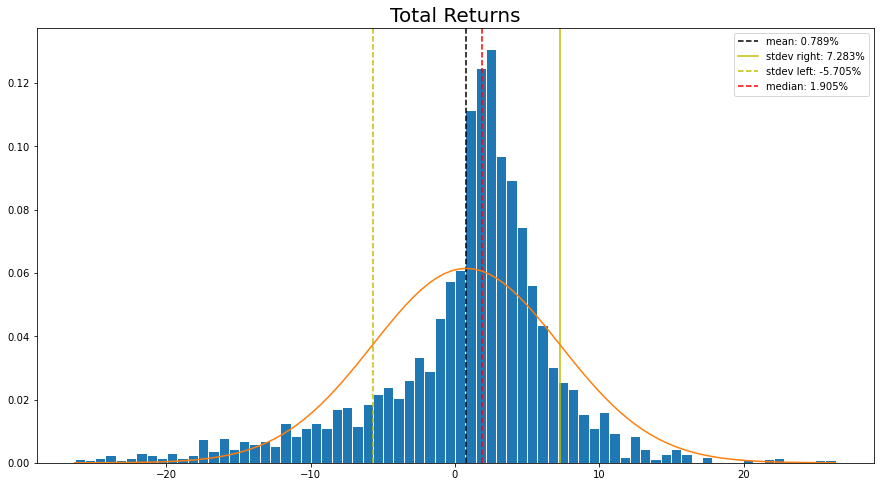

In [98]:
# HISTOGRAM
plt.rcParams['figure.figsize'] = 15, 8
plt.hist(final_list, bins='auto', edgecolor='w', density= True)
sd = stat.stdev(final_list)
m = stat.mean(final_list)
plt.axvline(m, color = 'k', linestyle = 'dashed', label = 'mean: ' + str(round(m, 3)) + '%')
plt.axvline(m + sd, color = 'y', linestyle = 'solid', label = 'stdev right: ' + str(round(m + sd, 3)) + '%')
plt.axvline(m - sd, color = 'y', linestyle = 'dashed', label = 'stdev left: ' + str(round(m - sd, 3)) + '%')
plt.axvline(np.median(final_list), color = 'r', linestyle = 'dashed', label = 'median: ' + str(round(np.median(final_list), 3)) + '%')

# OVERLAY DISTRIBUTION CURVE
data = np.linspace(min(final_list), max(final_list), 100)
plt.plot(data, norm.pdf(data, m, sd));

plt.title("Total Returns", fontsize = 20)
plt.legend()
plt.show()


The results above shows that after analyzing a portion of the companies in the PSE market. The average returns a trader could get is 0.789% with a median return of 1.905%. As the data is skewed to the right, using the median value might be more appropriate.

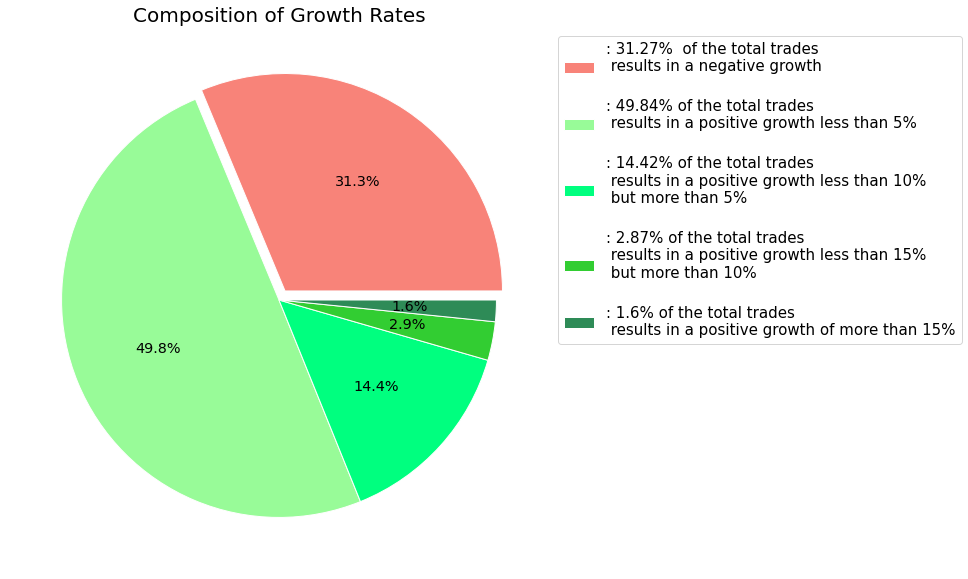

Total frequency of trades: 3690

Total frequency of positive trades: 2536

Total frequency of negative trades: 1154



In [144]:
# DATA FOR PIE CHART
tot_count = len(tot_growth)
neg_count = len(list(filter(lambda x: (x < 0), tot_growth)))
pos_count = len(list(filter(lambda x: (x >= 0), tot_growth)))
pos_5 = len(list(filter(lambda x: (x >= 5), tot_growth)))
pos_10 = len(list(filter(lambda x: (x >= 10), tot_growth)))
pos_15 = len(list(filter(lambda x: (x >= 15), tot_growth)))

plt.subplots(figsize=(10, 10))
name = np.array([neg_count, pos_count - pos_5, pos_5 - pos_10, pos_10 - pos_15, pos_15])
mylabels = [': ' + str(round(neg_count / tot_count * 100, 2)) + '%  of the total trades \n results in a negative growth \n', 
            ': ' + str(round((pos_count - pos_5) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 5% \n', 
            ': ' + str(round((pos_5 - pos_10) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 10% \n but more than 5% \n', 
            ': ' + str(round((pos_10 - pos_15) / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth less than 15%  \n but more than 10% \n',
            ': ' + str(round(pos_15 / tot_count * 100, 2)) + '% of the total trades \n results in a positive growth of more than 15%']
mycolor = ['#F88379', '#98fb98', '#00ff7f', '#32cd32', '#2e8b57']
myexplode = [0.05, 0, 0, 0, 0]
plt.pie(name, labels = mylabels, explode = myexplode, colors = mycolor, autopct='%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 15)
plt.title('Composition of Growth Rates', fontsize = 20)
plt.show()

print('Total frequency of trades: ' + str(tot_count) +'\n')
print('Total frequency of positive trades: ' + str(pos_count) +'\n')
print('Total frequency of negative trades: ' + str(neg_count) +'\n')

The Pie Chart above shows the composition of growth rate calculated from all the companies analyzed. The data shows that at least 68.73% of the trades done are profitable while 31.3% will be losses.

In conclusion, using the MACD indicator as a trading strategy in the PSE market could provide some profitable trades. Trading in the long run would provide a net positive in returns though the returns would be in range of 0.789% - 1.905%. Considering that fees amount to an estimated total of 1.19%, the growth of a portfolio would be really small.

#### THE END (CREATED BY: JEB TRABADO - 2023)